In [1]:
import requests
import os
import json
from io import StringIO
import pandas as pd
from langchain.agents import create_csv_agent
from langchain.llms import OpenAI
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("Data/tickers.csv")

In [3]:
# Count the number of files in the directory "Data/Tickers/General/"

dir_path = "Data/Tickers/General/"
num_files = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])

# Number of "Common Stock" && "Preferred Stock" tickers
total_stocks = df[(df['Type'] == 'Common Stock') | (df['Type'] == 'Preferred Stock')].shape[0]

# Percentage of data collected 
print(f"{num_files}/{total_stocks} ({num_files/total_stocks*100:.2f}%)")

5912/110025 (5.37%)


In [25]:

temp = df[(df['Type'] == 'Common Stock') | (df['Type'] == 'Preferred Stock')]
temp = temp["Code"].tolist()

"AAPL" in temp

True

In [4]:
agent = create_csv_agent(OpenAI(temperature=0), 
                            'Data/tickers.csv', 
                            model_name="gpt-4-32k",
                            verbose=True)

In [5]:
agent.agent.llm_chain.prompt.template


'\nYou are working with a pandas dataframe in Python. The name of the dataframe is `df`.\nYou should use the tools below to answer the question posed of you:\n\npython_repl_ast: A Python shell. Use this to execute python commands. Input should be a valid python command. When using this tool, sometimes output is abbreviated - make sure it does not look abbreviated before using it in your answer.\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [python_repl_ast]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\n\nThis is the result of `print(df.head())`:\n{df}\n\nBegin!\nQuestion: {input}\n{agent_scratchpad}'

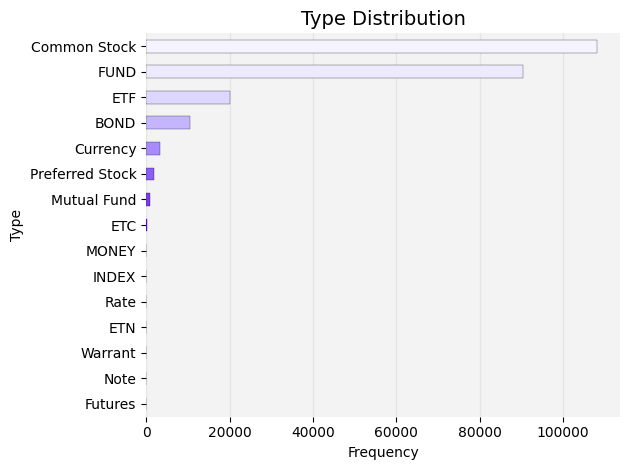

In [6]:


# Assuming you have a dataframe 'df' with a column 'Type'
violet_colors = [
    '#f5f3ff',
    '#ede9fe',
    '#ddd6fe',
    '#c4b5fd',
    '#a78bfa',
    '#8b5cf6',
    '#7c3aed',
    '#6d28d9',
    '#5b21b6',
    '#4c1d95',
    '#2e1065',
]
# Get the value counts and create a horizontal bar plot
type_counts = df['Type'].value_counts()
ax = type_counts.plot(kind='barh', color=violet_colors, edgecolor='black', linewidth=0.2)

# Set the title and axis labels
ax.set_title('Type Distribution', fontsize=14)
ax.set_ylabel('Type', fontsize=10)
ax.set_xlabel('Frequency', fontsize=10)

# Customize tick label size
ax.tick_params(axis='both', which='major', labelsize=10)

# Set the plot background color
ax.set_facecolor('#F3F3F3')
ax.set_axisbelow(True)

# Add gridlines with custom style
ax.grid(axis='x', linestyle='-', linewidth=1, alpha=0.2)

# Invert y-axis so that the item with the highest count is on top
ax.invert_yaxis()

# Customize the plot appearance
plt.tight_layout()

# Remove the plot frame
for spine in ax.spines.values():
    spine.set_visible(False)

# Show the plot
plt.show()


In [7]:
# Filter pd so type is "Common Stock" or "Preferred Stock"
df = df[df['Type'].isin(['Common Stock', 'Preferred Stock'])]

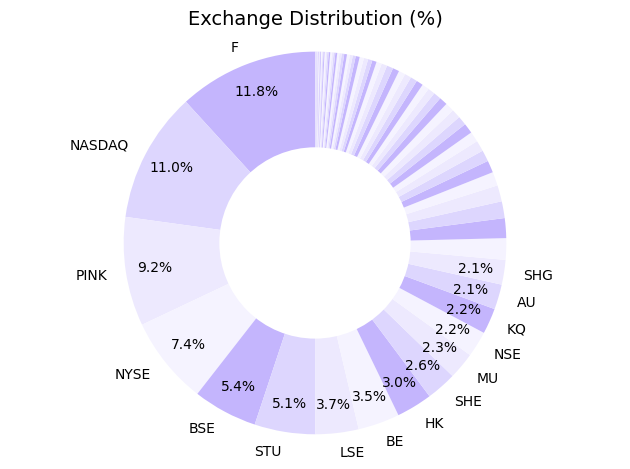

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a dataframe 'df' with a column 'Type'

# Custom color palette
violet_colors = [
    '#f5f3ff',
    '#ede9fe',
    '#ddd6fe',
    '#c4b5fd',
    # '#a78bfa',
    # '#8b5cf6',
    # '#7c3aed',
#     '#6d28d9',
#     '#5b21b6',
#     '#4c1d95',
#     '#2e1065',
]

# Get the value counts and calculate the percentages
type_counts = df['Exchange'].value_counts()
total_count = type_counts.sum()
type_percentages = type_counts / total_count * 100

# Create a pie chart with the calculated percentages
fig, ax = plt.subplots()
ax.pie(type_percentages, labels=[type if p >= 2 else '' for type,p in zip(type_percentages.index, type_percentages)], colors=violet_colors[::-1], autopct=lambda p: f'{p:.1f}%' if p >= 2 else ''  , startangle=90, pctdistance=0.85, textprops={'color': 'black'}, labeldistance=1.1)

# Set the title with black text color
ax.set_title('Exchange Distribution (%)', fontsize=14, color='black')

# Create a circle at the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie chart is a circle
ax.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


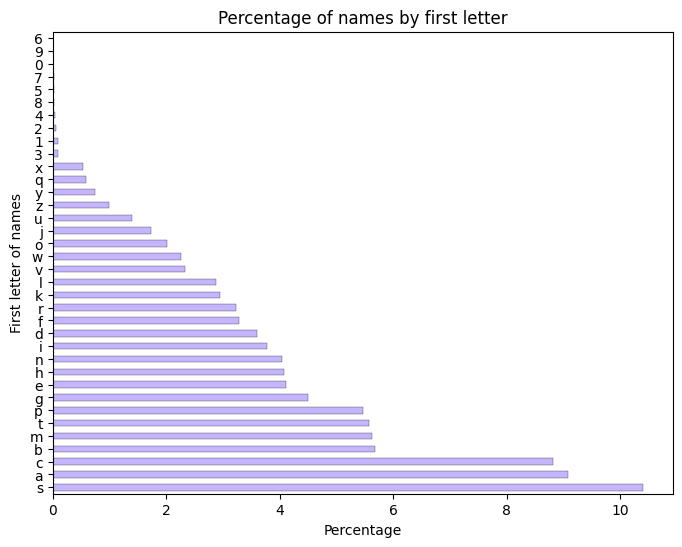

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import re
violet_colors = [
    # '#f5f3ff',
    # '#ede9fe',
    # '#ddd6fe',
    '#c4b5fd',
    # '#a78bfa',
    # '#8b5cf6',
    # '#7c3aed',
#     '#6d28d9',
#     '#5b21b6',
#     '#4c1d95',
#     '#2e1065',
]
# Assuming 'df' is your pandas DataFrame
# Only keep letters in the alphabet and numbers in the 'Name' column and convert to lowercase
df['Name'] = df['Name'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', '', str(x)).lower())

# Group by the first letter of the cleaned 'Name' column and count the values, sorted alphabetically
counts = df.groupby(df['Name'].str[0]).count()['Name'].sort_index(ascending=False)

# Calculate the percentages of names by the first letter of the name
total_count = counts.sum()
percentages = counts.apply(lambda x: (x / total_count) * 100)

# Sort the dataframe by the percentages
percentages = percentages.sort_values(ascending=False)


# Creating a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
percentages.plot(kind='barh', color=violet_colors, edgecolor='black', linewidth=0.2, ax=ax)

# Setting labels and title
ax.set_xlabel('Percentage')
ax.set_ylabel('First letter of names')
ax.set_title('Percentage of names by first letter')

# Displaying the plot
plt.show()


In [10]:
agent.run("Show me the number of stocks")




> Entering new AgentExecutor chain...
Thought: I need to count the number of rows in the dataframe
Action: python_repl_ast
Action Input: df.shape[0]
Observation: 235664
Thought: I now know the final answer
Final Answer: There are 235664 stocks in the dataframe.

> Finished chain.


'There are 235664 stocks in the dataframe.'

In [127]:
agent.run("Why do you think that is?")




> Entering new AgentExecutor chain...
Thought: I should look at the dataframe to see what is causing this.
Action: python_repl_ast
Action Input: df.info()<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235664 entries, 0 to 235663
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Code      235662 non-null  object
 1   Name      235663 non-null  object
 2   Country   235664 non-null  object
 3   Exchange  235620 non-null  object
 4   Currency  234743 non-null  object
 5   Type      235663 non-null  object
 6   Isin      133703 non-null  object
 7   Delisted  235664 non-null  bool  
dtypes: bool(1), object(7)
memory usage: 12.8+ MB

Observation: None
Thought: I should look at the data types of each column.
Action: python_repl_ast
Action Input: df.dtypes
Observation: Code        object
Name        object
Country     object
Exchange    object
Currency    object
Type        object
Isin        object
Delisted      bool
dtype

'The output is not formatted correctly because the data types of the columns are all objects.'